# Import and Load Files

In [42]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files and json
invoices_df = pd.read_csv('/Users/macbookpro/Downloads/invoices.csv')
customers_df = pd.read_json('/Users/macbookpro/Downloads/customer.json')

# Dataframe

In [65]:
invoices_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [53]:
customers_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy Questions

#### 1.How many unique customers are in the dataset?

In [83]:
unique_customers_count = customers_df['id'].nunique()
print(f"Number of Unique Customers: {unique_customers_count}")

Number of Unique Customers: 5191


#### 2. What are the different categories of products available? How many unique categories are there?

In [91]:
product_categories = invoices_df['category'].unique()
print(f"Product categories: {product_categories}")

unique_categories_count = invoices_df['category'].nunique()
print(f"Number of unique categories: {unique_categories_count}")

Product categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


#### 3. Which payment method is the most popular? How many times was it used?

In [98]:
payment_method_counts = invoices_df['payment_method'].value_counts()
## Note: value_counts() method counts occurences of each unique value

most_popular_payment = payment_method_counts.idxmax()
## Note: This line finds the index (payment method) with the maximum count in the payment_method_counts Series.

num_times_used = payment_method_counts.max()
## Note: This line finds the maximum value in the payment_method_counts Series.

print(f"The most popular payment method is '{most_popular_payment}', used {num_times_used} times.")

The most popular payment method is 'Cash', used 44447 times.


# Medium Questions

#### 1. What are the three most popular categories, by total sales?

In [132]:
invoices_df['category'].value_counts()
## Note: For checking

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [130]:
sales_by_category = invoices_df.groupby('category')['quantity'].sum().sort_values(ascending=False)
top_3_categories = sales_by_category.head(3).index

print("Three most popular categories by total sales:")
print(top_3_categories)

Three most popular categories by total sales:
Index(['Clothing', 'Cosmetics', 'Food & Beverage'], dtype='object', name='category')


#### 2. What are the total sales attributed to customers over the age of 45?

In [153]:
customers_over_45 = customers_df[customers_df['age'] > 45]
customer_ids_over_45 = customers_over_45['id'].tolist()

sales_over_45 = invoices_df[invoices_df['customer_id'].isin(customer_ids_over_45)]
total_sales_over_45 = (sales_over_45['quantity'] * sales_over_45['price']).sum()

print(f"Total sales of cutomers over the age of 45: {total_sales_over_45}")

Total sales of cutomers over the age of 45: 82039768.15


#### 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.

In [159]:
invoices_df['invoice_date']

0          5/8/2022
1        12/12/2021
2         9/11/2021
3        16/05/2021
4        24/10/2021
            ...    
99452    21/09/2022
99453    22/09/2021
99454    28/03/2021
99455    16/03/2021
99456    15/10/2022
Name: invoice_date, Length: 99457, dtype: object

In [168]:
# Convert Invoice Date to Datetime
pd.to_datetime(invoices_df['invoice_date'], format='%d/%m/%Y')

0       2022-08-05
1       2021-12-12
2       2021-11-09
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]

In [172]:
# Group by date and sum the quantity
sales_by_date = invoices_df.groupby(invoices_df['invoice_date'].dt.date)['quantity'].sum()

invoice_date
2021-01-01    333
2021-01-02    387
2021-01-03    405
2021-01-04    379
2021-01-05    374
             ... 
2023-03-04    435
2023-03-05    354
2023-03-06    401
2023-03-07    306
2023-03-08    320
Name: quantity, Length: 797, dtype: int64

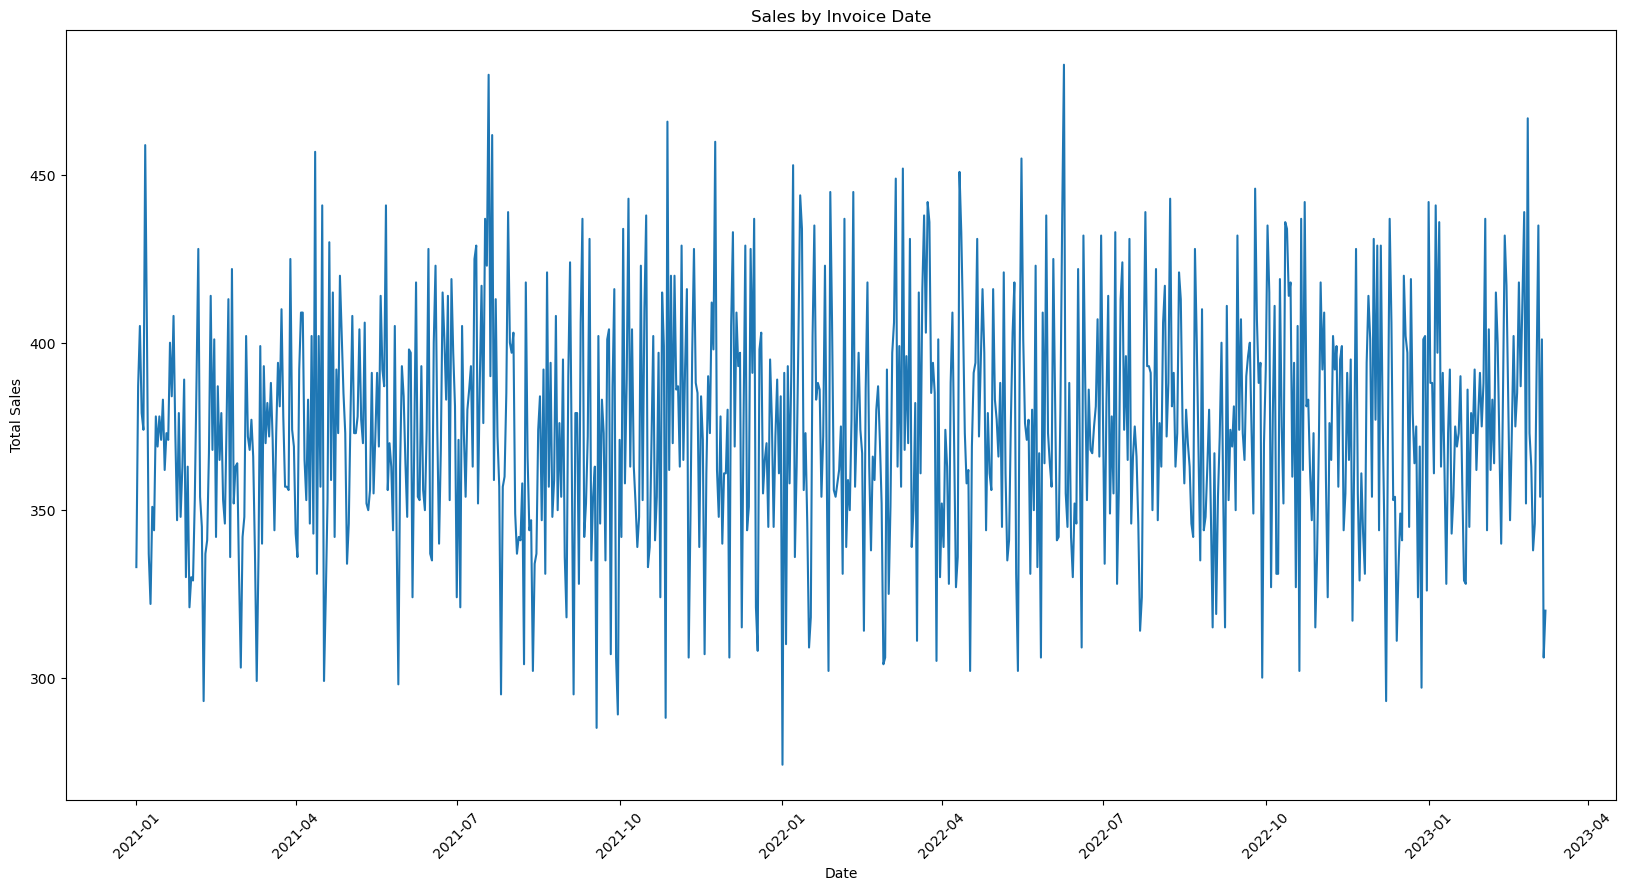

In [178]:
# Plot
plt.figure(figsize=(20, 10))
sales_by_date.plot()
plt.title('Sales by Invoice Date')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Hard Questions

#### 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [202]:
# Create 'AgeDecade' Column
customers_df['AgeDecade'] = (customers_df['age'] // 10) * 10

# Merge DataFrames Using Correct Column Names
sales_pivot = invoices_df.merge(customers_df[['id', 'AgeDecade']], left_on='customer_id', right_on='id')

# Group by category and AgeDecade, then sum the quantities
sales_pivot = sales_pivot.groupby(['category', 'AgeDecade'])['quantity'].sum().unstack(fill_value=0)

# Display the pivot table
display(sales_pivot)


AgeDecade,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0
category,,,,,,,,
Books,229,1427,1518,1542,1364,1420,1019,500
Clothing,1727,9392,10247,10220,9343,9700,7055,4095
Cosmetics,730,4060,4871,4460,3958,4344,2807,1752
Food & Beverage,697,3906,4540,4677,3824,4243,2862,1637
Shoes,457,2716,3186,3148,2652,2696,2017,1180
Souvenir,281,1304,1496,1514,1286,1307,903,558
Technology,274,1359,1590,1553,1162,1457,931,522
Toys,480,2859,3217,2983,2626,2797,2078,1201
